In [4]:
import nltk
import spacy

In [5]:
nltk.download('punkt')  # Download tokenizer for basic text processing

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\msikh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [57]:
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding: [0.008344464004039764, 0.00048085112939588726, 0.06595247983932495, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.0508086197078228, -0.016524285078048706, 0.015737811103463173, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.02833268791437149, -0.055862173438072205, -0.012941457331180573, ...]



In [58]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

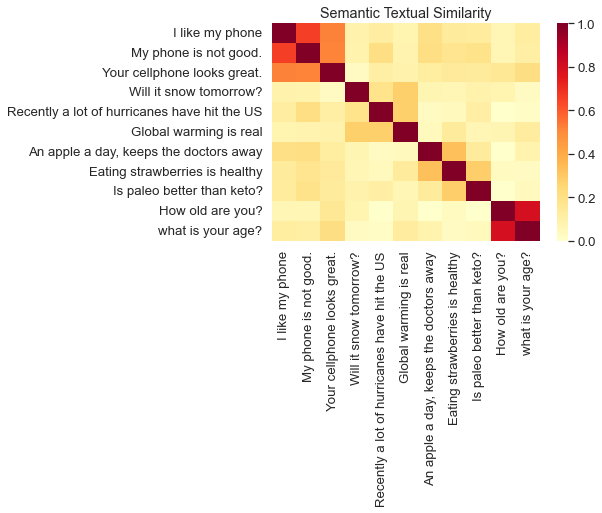

In [59]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine

# Load the Universal Sentence Encoder's TF Hub module
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print("Module %s loaded" % module_url)

def embed(input):
    return model(input)

def compute_similarity(embeddings1, embeddings2):
    """
    Computes the cosine similarity between two sets of embeddings.
    """
    return np.inner(embeddings1, embeddings2)

# Prepare your dataset (This is an example; replace with your actual dataset)
# Let's pretend we have a simple dataset of sentences
sentences = [
    "Fair Balance: The presentation of both the benefits and risks of a drug must be balanced. This means that the advertisement must not overemphasize the benefits while downplaying the risks.",

"Non-Misleading Information: Information provided in the advertisement must not be misleading in any way. This includes making false or exaggerated claims about the drug's efficacy or safety.",

"Consistency with Labeling: The advertisement must be consistent with the drug's FDA-approved labeling. This means it can only promote the drug for the indications and conditions for which it has been approved.",

"Substantiation of Claims: All claims made in the advertisement must be substantiated by evidence. This means that any efficacy claims must be backed by data from clinical trials or other scientific evidence.",

"Presentation of Risk Information: Risk information must be presented clearly and prominently, in a way that is understandable to the target audience. This includes serious risks and the most common side effects."
]
# Convert sentences to embeddings
dataset_embeddings = embed(sentences)

# Input text for which you want to find similar sentences in the dataset
input_text = "With RelievaX, stepping into a world free from the constraints of chronic pain is more than a possibility—it's your new reality. Approved for the management of chronic pain, RelievaX has been shown in clinical trials to significantly reduce daily pain levels, helping patients reclaim their routines with confidence and comfort. Important Safety Information: RelievaX is not for everyone. Do not use RelievaX if you have a history of heart disease, liver conditions, or a known allergy to RelievaX. Common side effects include nausea, fatigue, and dizziness. Serious risks may include increased risk of heart attack or stroke, liver damage, and addiction. Use only as directed by your healthcare provider. Balance benefits with risks and discuss with your doctor to see if RelievaX is right for you"
input_embedding = embed([input_text])

# Compute similarities between the input text and the dataset
similarities = compute_similarity(input_embedding, dataset_embeddings)[0]

# Find the index of the highest similarity score
most_similar_index = np.argmax(similarities)

# Retrieve the most similar sentence and its score
most_similar_sentence = sentences[most_similar_index]
most_similar_score = similarities[most_similar_index]

print(f"Input text: {input_text}")
print(f"Most similar sentence in dataset: {most_similar_sentence}")
print(f"Similarity score: {most_similar_score}")


ModuleNotFoundError: No module named 'tensorflow_hub'

In [1]:
import pandas as pd

# Defining the ad copy and compliance highlights for each fictional ad
ads_data = [("Experience relief from chronic arthritis pain with RelieveIt. Clinically proven to reduce joint pain and improve mobility. Side effects may include nausea, dizziness, and headaches. Not recommended for patients with kidney disease or pregnant women. Talk to your doctor to see if RelieveIt is right for you.", "Fair balance, risk information."),
    ("Achieve clearer skin with ClearSkin, the FDA-approved treatment for severe acne. Based on clinical studies showing significant improvement in 90% of participants. May cause skin dryness and sensitivity to sunlight. Consult with your healthcare provider before starting ClearSkin.", "Evidence substantiation, non-misleading."),
    ("Struggle with insomnia? SleepWell can help you find the rest you deserve. Proven effective in clinical trials, SleepWell has helped many achieve restful sleep with minimal side effects, which can include mild morning drowsiness. Not for use by individuals under 18. Discuss with your doctor.", "Clear and conspicuous, fair balance."),
    ("Protect your heart with HeartHealth. Designed for those with a history of heart conditions, HeartHealth has been shown to lower the risk of heart attacks. Important risks include potential interactions with other medications and minor digestive issues. Ensure it's safe by consulting your doctor.", "Risk information, non-misleading."),
    ("Improve your memory and cognitive function with BrainBoost. Backed by extensive research and clinical trials, BrainBoost is safe and effective for enhancing cognition. Side effects are rare but can include fatigue and insomnia. Ideal for adults experiencing mild cognitive impairment. See if BrainBoost is right for you.", "Evidence substantiation, clear and conspicuous."),
    ("Live a life less interrupted by chronic pain with PainAway. In clinical trials, PainAway was shown to significantly reduce chronic back pain with a well-tolerated side effect profile. Common side effects include mild gastrointestinal discomfort. Not suitable for individuals with liver conditions. Ask your healthcare provider if PainAway can help you.", "Fair balance, risk information, clear and conspicuous."),
    ("Find your way back to happiness with BrightMood. Specially formulated for those suffering from depression, BrightMood has proven efficacy in clinical trials for improving mood and well-being. Side effects may include insomnia and dry mouth. BrightMood is not for use alongside MAOI inhibitors. Consult with your doctor for more information.", "Non-misleading, evidence substantiation."),
    ("Seasonal allergies shouldn't control your life. AllerFree provides 24-hour relief from sneezing, runny nose, and itchy eyes. Clinically tested and proven effective for both indoor and outdoor allergies. Possible side effects are mild and include sore throat and headache. Discuss with your doctor to see if AllerFree is right for your allergy management.", "Clear and conspicuous, fair balance, risk information."),
    ("Boost your concentration and focus with FocusMax. Designed for adults with ADHD, FocusMax has shown to improve attention span and reduce impulsivity in clinical studies. Side effects can include loss of appetite and difficulty sleeping. Not recommended for children under 12 years of age. Consult with your healthcare professional to determine if FocusMax suits your needs.", "Evidence substantiation, non-misleading, fair balance."),
    ("Support your digestive health with DigestEase. Our advanced formula promotes a healthy gut flora and aids digestion. In clinical trials, users reported improved digestive comfort. DigestEase is safe for daily use, with few reported side effects, primarily including mild bloating. Not intended for those with known probiotic allergies. Talk to your healthcare provider about adding DigestEase to your daily routine.", "Clear and conspicuous, risk information, non-misleading."),
    ("Regain peace with CalmMind, the latest in anxiety management. Proven in clinical trials to reduce symptoms of anxiety without dependency. Some users experience mild fatigue or headaches. Not suitable for those currently on benzodiazepines. Inquire with your healthcare provider about CalmMind today.", "Non-misleading, evidence substantiation, risk information."),
    ("Protect your skin from harsh UV rays with SunShield. Our SPF 50 formula is dermatologist-recommended and water-resistant. Suitable for sensitive skin, with rare reports of mild irritation. Remember, reducing sun exposure is the best defense against skin damage. Consult your dermatologist.", "Fair balance, clear and conspicuous."),
    ("Brighten your mood with MoodBright. Clinically proven to support mental wellness, it's a beacon for those facing mild to moderate depression. Side effects can include light headaches. Not a substitute for antidepressants. Discuss MoodBright with your psychiatrist.", "Clear and conspicuous, non-misleading."),
    ( "Rediscover deep sleep with PureSleep, without next-day drowsiness. Effective for occasional sleeplessness, with a safety profile that prioritizes your rest. Not for chronic insomnia or in pregnancy. Explore the benefits of PureSleep by talking to your healthcare provider.", "Evidence substantiation, risk information."),
    ( "Enhance your lung capacity with LungLife. Ideal for those recovering from respiratory conditions, it supports healthy lung function. Monitor for dry cough as a possible side effect. Not for asthma without medical consultation. Learn if LungLife complements your recovery plan.","Non-misleading, fair balance."),
    ( "Achieve mental clarity with ClarityMind. Our cognitive support formula boosts concentration and memory. Some users may experience restlessness. Evaluate ingredient compatibility with any current medications. Consult your healthcare provider for personalized guidance.", "Clear risk information, evidence substantiation."),
    ( "Boost your immune system with ImmunoStrong. Formulated for optimal immune defense, it's your ally in wellness. Side effects are rare but can include mild stomach upset. Not for autoimmune disorders without consulting a specialist. Strengthen your defense with ImmunoStrong.", "Fair balance, clear and conspicuous."),
    ( "Strengthen your bones with BoneBuild. Our calcium-rich supplement is designed to support bone density and health. Possible side effects include constipation. Ensure adequate hydration. Ideal for post-menopausal women. Confirm BoneBuild's fit in your health routine with your doctor.", "Non-misleading, risk information."),
    ("Calm sensitive skin with SereneSkin. Our gentle formula soothes irritation and redness, promoting healthy skin. Minor side effects include local tingling. Patch test before full use. Not for severe dermatological conditions. Dermatologist consultation recommended.", "Evidence substantiation, fair balance."),
    ( "EasePain offers relief for chronic arthritis pain, helping you return to your daily activities with less discomfort. Clinical trials show significant pain reduction for most users. Side effects may include nausea and dizziness. Not for use if allergic to Painolax. Discuss with your healthcare provider.", "Demonstrates fair balance by presenting benefits alongside potential side effects."),
    ( "Achieve clear skin with ClearDerm, the solution for severe acne. In studies, 85% saw improvement within weeks. Potential side effects include dryness and light sensitivity. Use as directed by your healthcare provider.", "Provides non-misleading information with statistics to support claims, alongside side effect disclosure."),
    ("Rediscover restful nights with SleepEase, designed to safely improve sleep quality. Clinically proven effectiveness with minimal risk of dependency. Some users report mild morning grogginess. Consult your doctor to see if SleepEase is right for you.","Adheres to fair balance and clear presentation of risks, highlighting minimal dependency risk."),
    ( "Protect your heart with HeartGuard. For those managing cholesterol, HeartGuard works with your body to maintain heart health. It’s not suitable for everyone; known side effects include muscle pain and fatigue. Always check with your healthcare provider before starting a new supplement.",  "Risk information is clearly communicated, emphasizing the ad's non-misleading nature."),
    ("Enhance your cognitive functions with MindBright. Scientifically formulated to support memory and concentration. While generally well-tolerated, some may experience mild headaches. Not intended for those under 18. Consult with a healthcare professional to ensure MindBright aligns with your health goals.", "Offers a balanced view on efficacy and risks, ensuring the ad is accurate and not misleading."),
    ("Move freely with JointFlex, your ally against joint stiffness and discomfort. Proven in clinical trials to enhance mobility. Common side effects include mild gastrointestinal upset. Not recommended for individuals with severe liver conditions. Consult with your doctor to explore if JointFlex suits your needs.", "Clear risk information, fair balance."),
    ("Brighten your days with SunnyMood, the Vitamin D supplement for those who need a little sunshine. Supports overall mood improvement as shown in clinical studies. Rare side effects include mild hypercalcemia when taken in excess. Ensure proper usage by speaking with a healthcare provider.", "Accuracy and non-misleading information."),
    ( "Take a deep breath with BreatheRight, designed for those with mild asthma. Experience improved breathing and reduced wheezing. Note: not a replacement for rescue inhalers. Potential side effects are throat irritation and coughing. Discuss BreatheRight with your pulmonologist.", "Risk information, fair balance."),
    ( "Say goodbye to acne with ZapZit. Targets acne at its source, providing visible results in as little as two weeks. Side effects can include skin irritation and redness. Not suitable for those with sensitive skin. For best results, use under the guidance of a dermatologist.", "Clear and conspicuous risk information."),
    ( "Support your brain health with OmegaMind, enriched with Omega-3 fatty acids. Clinically proven to enhance cognitive function. Some users report mild fishy aftertaste. Ideal for adults seeking to support their mental agility. Consult your healthcare provider for personalized advice.","Non-misleading, evidence substantiation."),
    ("Support your nerves with NerveNourish. Designed for those experiencing neuropathic discomfort, our formula is backed by science. Side effects may include mild drowsiness or nausea. Not recommended for use with certain antidepressants. Consult your neurologist before starting NerveNourish.",  "Clear risk information, evidence substantiation."),
    ("Ease your digestive woes with DigestWell. Our probiotic blend helps balance your gut health naturally. Some users report bloating initially. Not for those with immune system issues without doctor advice. Ask your gastroenterologist if DigestWell is right for you.", "Non-misleading, fair balance."),
    ( "Regain flexibility with FlexiJoint. Our advanced formula promotes joint health and mobility. Rare side effects include mild skin rash. Carefully review ingredients for allergies. Your healthcare provider can help decide if FlexiJoint fits your health regimen.","Fair balance, risk information."),
    ("Achieve restful sleep with ZzzNight, without the grogginess. Clinically proven to help you fall asleep faster and stay asleep longer. Common side effects include mild morning drowsiness. Avoid alcohol when taking ZzzNight. Speak to your doctor about whether ZzzNight is right for you.", "Non-misleading, fair balance."),
    ("Manage your blood sugar naturally with GlucoBalance. Designed to complement your diabetes treatment plan, our studies show improved blood sugar levels with minimal side effects, including mild nausea. Not a replacement for your diabetes medication. Consult your endocrinologist.", "Evidence substantiation, clear and conspicuous."),
    ("Inhale life to the fullest with BreatheEasy. Our fast-acting asthma relief inhaler is shown to reduce the frequency of asthma attacks. Possible side effects include throat irritation and a fast heartbeat. Not for use as a rescue inhaler. Talk to your pulmonologist about BreatheEasy.", "Fair balance, risk information, non-misleading."),
    ("See the world more clearly with VisionClear, the once-daily eye health supplement. Clinically proven to enhance visual acuity and eye health, with minimal side effects. Not suitable for individuals with certain retinal conditions. Ensure it's right for you by consulting with your ophthalmologist.", "Clear and conspicuous, evidence substantiation."),
    ("End the cycle of migraine pain with MigraineEnd. Our targeted treatment has been clinically shown to reduce migraine frequency and severity. Side effects may include dizziness and dry mouth. Not for use in pregnancy. Evaluate if MigraineEnd fits into your migraine management plan with your healthcare provider.", "Non-misleading, fair balance, risk information."),
    ("Relieve itchy, irritated skin with EczemaSoothe. Our cream provides clinically proven relief for eczema sufferers, with a gentle formula suitable for all ages. Rare side effects include skin discoloration. Not intended for use on broken skin. Consult your dermatologist about EczemaSoothe.", "Clear and conspicuous, evidence substantiation."),
    ("Support heart health with OmegaHeart. Our omega-3 supplement is shown to support healthy cholesterol levels. In rare cases, users report a fishy aftertaste. Not a substitute for cholesterol-lowering drugs. Discuss the addition of OmegaHeart to your diet with your cardiologist.", "Non-misleading, fair balance, risk information.")
]


In [2]:
ads_data += [

    ("Brighten your mood with MoodBright. Clinically proven to support mental wellness, it's a beacon for those facing mild to moderate depression. Side effects can include light headaches. Not a substitute for antidepressants. Discuss MoodBright with your psychiatrist.", "Clear and conspicuous, non-misleading."),
    ( "Rediscover deep sleep with PureSleep, without next-day drowsiness. Effective for occasional sleeplessness, with a safety profile that prioritizes your rest. Not for chronic insomnia or in pregnancy. Explore the benefits of PureSleep by talking to your healthcare provider.", "Evidence substantiation, risk information."),
    ( "Enhance your lung capacity with LungLife. Ideal for those recovering from respiratory conditions, it supports healthy lung function. Monitor for dry cough as a possible side effect. Not for asthma without medical consultation. Learn if LungLife complements your recovery plan.","Non-misleading, fair balance."),
    ( "Achieve mental clarity with ClarityMind. Our cognitive support formula boosts concentration and memory. Some users may experience restlessness. Evaluate ingredient compatibility with any current medications. Consult your healthcare provider for personalized guidance.", "Clear risk information, evidence substantiation."),
    ( "Boost your immune system with ImmunoStrong. Formulated for optimal immune defense, it's your ally in wellness. Side effects are rare but can include mild stomach upset. Not for autoimmune disorders without consulting a specialist. Strengthen your defense with ImmunoStrong.", "Fair balance, clear and conspicuous."),
    ( "Strengthen your bones with BoneBuild. Our calcium-rich supplement is designed to support bone density and health. Possible side effects include constipation. Ensure adequate hydration. Ideal for post-menopausal women. Confirm BoneBuild's fit in your health routine with your doctor.", "Non-misleading, risk information."),
    ("Calm sensitive skin with SereneSkin. Our gentle formula soothes irritation and redness, promoting healthy skin. Minor side effects include local tingling. Patch test before full use. Not for severe dermatological conditions. Dermatologist consultation recommended.", "Evidence substantiation, fair balance."),

    ( "EasePain offers relief for chronic arthritis pain, helping you return to your daily activities with less discomfort. Clinical trials show significant pain reduction for most users. Side effects may include nausea and dizziness. Not for use if allergic to Painolax. Discuss with your healthcare provider.", "Demonstrates fair balance by presenting benefits alongside potential side effects."),
    ( "Achieve clear skin with ClearDerm, the solution for severe acne. In studies, 85% saw improvement within weeks. Potential side effects include dryness and light sensitivity. Use as directed by your healthcare provider.", "Provides non-misleading information with statistics to support claims, alongside side effect disclosure."),
    ("Rediscover restful nights with SleepEase, designed to safely improve sleep quality. Clinically proven effectiveness with minimal risk of dependency. Some users report mild morning grogginess. Consult your doctor to see if SleepEase is right for you.","Adheres to fair balance and clear presentation of risks, highlighting minimal dependency risk."),
    ( "Protect your heart with HeartGuard. For those managing cholesterol, HeartGuard works with your body to maintain heart health. It’s not suitable for everyone; known side effects include muscle pain and fatigue. Always check with your healthcare provider before starting a new supplement.",  "Risk information is clearly communicated, emphasizing the ad's non-misleading nature."),
    ("Enhance your cognitive functions with MindBright. Scientifically formulated to support memory and concentration. While generally well-tolerated, some may experience mild headaches. Not intended for those under 18. Consult with a healthcare professional to ensure MindBright aligns with your health goals.", "Offers a balanced view on efficacy and risks, ensuring the ad is accurate and not misleading."),
    ("Move freely with JointFlex, your ally against joint stiffness and discomfort. Proven in clinical trials to enhance mobility. Common side effects include mild gastrointestinal upset. Not recommended for individuals with severe liver conditions. Consult with your doctor to explore if JointFlex suits your needs.", "Clear risk information, fair balance."),
    ("Brighten your days with SunnyMood, the Vitamin D supplement for those who need a little sunshine. Supports overall mood improvement as shown in clinical studies. Rare side effects include mild hypercalcemia when taken in excess. Ensure proper usage by speaking with a healthcare provider.", "Accuracy and non-misleading information."),
    ( "Take a deep breath with BreatheRight, designed for those with mild asthma. Experience improved breathing and reduced wheezing. Note: not a replacement for rescue inhalers. Potential side effects are throat irritation and coughing. Discuss BreatheRight with your pulmonologist.", "Risk information, fair balance."),
    ( "Say goodbye to acne with ZapZit. Targets acne at its source, providing visible results in as little as two weeks. Side effects can include skin irritation and redness. Not suitable for those with sensitive skin. For best results, use under the guidance of a dermatologist.", "Clear and conspicuous risk information."),
    ( "Support your brain health with OmegaMind, enriched with Omega-3 fatty acids. Clinically proven to enhance cognitive function. Some users report mild fishy aftertaste. Ideal for adults seeking to support their mental agility. Consult your healthcare provider for personalized advice.","Non-misleading, evidence substantiation."),
    ("Support your nerves with NerveNourish. Designed for those experiencing neuropathic discomfort, our formula is backed by science. Side effects may include mild drowsiness or nausea. Not recommended for use with certain antidepressants. Consult your neurologist before starting NerveNourish.",  "Clear risk information, evidence substantiation."),
    ("Ease your digestive woes with DigestWell. Our probiotic blend helps balance your gut health naturally. Some users report bloating initially. Not for those with immune system issues without doctor advice. Ask your gastroenterologist if DigestWell is right for you.", "Non-misleading, fair balance."),
    ( "Regain flexibility with FlexiJoint. Our advanced formula promotes joint health and mobility. Rare side effects include mild skin rash. Carefully review ingredients for allergies. Your healthcare provider can help decide if FlexiJoint fits your health regimen.","Fair balance, risk information.")]

In [3]:
# Creating a DataFrame
ads_df = pd.DataFrame(ads_data, columns=["Ad Copy", "Compliance Highlight"])

# Displaying the DataFrame to ensure it's created correctly
ads_df

,Ad Copy,Compliance Highlight
0,Experience relief from chronic arthritis pain ...,"Fair balance, risk information."
1,"Achieve clearer skin with ClearSkin, the FDA-a...","Evidence substantiation, non-misleading."
2,Struggle with insomnia? SleepWell can help you...,"Clear and conspicuous, fair balance."
3,Protect your heart with HeartHealth. Designed ...,"Risk information, non-misleading."
4,Improve your memory and cognitive function wit...,"Evidence substantiation, clear and conspicuous."
5,Live a life less interrupted by chronic pain w...,"Fair balance, risk information, clear and cons..."
6,Find your way back to happiness with BrightMoo...,"Non-misleading, evidence substantiation."
7,Seasonal allergies shouldn't control your life...,"Clear and conspicuous, fair balance, risk info..."
8,Boost your concentration and focus with FocusM...,"Evidence substantiation, non-misleading, fair ..."
9,Support your digestive health with DigestEase....,"Clear and conspicuous, risk information, non-m..."


In [4]:
ads_df.to_csv('ads_data.csv', index=False)

The compliances will get seperated here and put into an array

In [5]:
# Transform the "Compliance Highlight" column into an array of elements
ads_df['Compliance Highlight'] = ads_df['Compliance Highlight'].apply(lambda x: x.split(', '))


Compress the compliances into 5 categories

In [6]:
# Define the mapping from original compliances to new, compressed categories
compressed_categories = {
    'Fair Balance and Risk Information': [
        'Fair balance', 'risk information', 'Adheres to fair balance and clear presentation of risks',
        'Clear risk information', 'Demonstrates fair balance by presenting benefits alongside potential side effects.',
        'fair balance.', 'risk information.', 'Clear and conspicuous risk information.',
        'highlighting minimal dependency risk.'
    ],
    'Clear and Conspicuous': [
        'Clear and conspicuous', 'clear and conspicuous.'
    ],
    'Evidence Substantiation': [
        'Evidence substantiation', 'evidence substantiation', 'evidence substantiation.'
    ],
    'Non-Misleading': [
        'Non-misleading', 'Accuracy and non-misleading information.', 'ensuring the ad is accurate and not misleading.',
        'non-misleading.', 'Non-misleading.'
    ]
}

# Reverse the mapping for easier lookup
reverse_mapping = {}
for new_label, old_labels in compressed_categories.items():
    for old_label in old_labels:
        reverse_mapping[old_label] = new_label

# Function to compress compliance categories
def compress_compliance(compliances):
    new_compliances = set()
    for compliance in compliances:
        if compliance in reverse_mapping:
            new_compliances.add(reverse_mapping[compliance])
        else:
            new_compliances.add('Other Compliances')
    return list(new_compliances)

# Apply the compression
ads_df['Compliance Highlight'] = ads_df['Compliance Highlight'].apply(compress_compliance)

# Show the transformed dataframe
ads_df.head()

,Ad Copy,Compliance Highlight
0,Experience relief from chronic arthritis pain ...,[Fair Balance and Risk Information]
1,"Achieve clearer skin with ClearSkin, the FDA-a...","[Evidence Substantiation, Non-Misleading]"
2,Struggle with insomnia? SleepWell can help you...,"[Clear and Conspicuous, Fair Balance and Risk ..."
3,Protect your heart with HeartHealth. Designed ...,"[Other Compliances, Non-Misleading]"
4,Improve your memory and cognitive function wit...,"[Clear and Conspicuous, Evidence Substantiation]"


In [7]:
# Show the transformed dataframe
ads_df

,Ad Copy,Compliance Highlight
0,Experience relief from chronic arthritis pain ...,[Fair Balance and Risk Information]
1,"Achieve clearer skin with ClearSkin, the FDA-a...","[Evidence Substantiation, Non-Misleading]"
2,Struggle with insomnia? SleepWell can help you...,"[Clear and Conspicuous, Fair Balance and Risk ..."
3,Protect your heart with HeartHealth. Designed ...,"[Other Compliances, Non-Misleading]"
4,Improve your memory and cognitive function wit...,"[Clear and Conspicuous, Evidence Substantiation]"
5,Live a life less interrupted by chronic pain w...,"[Clear and Conspicuous, Fair Balance and Risk ..."
6,Find your way back to happiness with BrightMoo...,"[Evidence Substantiation, Non-Misleading]"
7,Seasonal allergies shouldn't control your life...,"[Other Compliances, Clear and Conspicuous, Fai..."
8,Boost your concentration and focus with FocusM...,"[Other Compliances, Evidence Substantiation, F..."
9,Support your digestive health with DigestEase....,"[Clear and Conspicuous, Fair Balance and Risk ..."


In [8]:
new_entries = [
    {"Ad Copy": "Stay hydrated and full of energy with AquaBoost, the water bottle that reminds you to drink every hour. Featuring a smart alert system, AquaBoost is your perfect hydration partner.",
     "Compliance Highlight": ['Clear and Conspicuous', 'Non-Misleading']},
    {"Ad Copy": "Find peace and tranquility with ZenSpace, the app that guides you through daily meditation and mindfulness exercises. Reduce stress and improve your mental health in just 10 minutes a day.",
     "Compliance Highlight": ['Evidence Substantiation', 'Non-Misleading']},
    {"Ad Copy": "Get back to nature with GreenThumb, our organic, non-GMO seeds for your home garden. Grow your own vegetables and herbs with confidence, knowing you're choosing a sustainable option.",
     "Compliance Highlight": ['Fair Balance and Risk Information', 'Non-Misleading', 'Other Compliances']},
    {"Ad Copy": "Revitalize your skin with PureGlow, our all-natural skincare line. Made with organic ingredients, PureGlow nourishes your skin, leaving it soft and radiant.",
     "Compliance Highlight": ['Clear and Conspicuous', 'Evidence Substantiation']},
    {"Ad Copy": "Simplify your meal prep with QuickChef, the kitchen gadget that chops, slices, and dices in seconds. Make cooking faster, easier, and more enjoyable.",
     "Compliance Highlight": ['Clear and Conspicuous', 'Non-Misleading', 'Other Compliances']},
    {"Ad Copy": "Boost your morning routine with VitaBoost multivitamins, tailored to support your energy and immunity with just one capsule a day. Designed for modern life.", "Compliance Highlight": ['Evidence Substantiation', 'Non-Misleading']},
    {"Ad Copy": "Embrace a healthier lifestyle with GreenCycle, the eco-friendly fitness app that plants a tree for every workout you complete. Get fit and support the planet.", "Compliance Highlight": ['Clear and Conspicuous', 'Other Compliances']},
    {"Ad Copy": "Upgrade your home office with ErgoChair, featuring advanced lumbar support and customizable settings to ensure maximum comfort for long working hours.", "Compliance Highlight": ['Non-Misleading', 'Clear and Conspicuous']},
    {"Ad Copy": "Discover the secrets of the stars with AstroGuide, your personal gateway to understanding the cosmos. Unveil your future with our daily horoscopes.", "Compliance Highlight": ['Other Compliances']},
    {"Ad Copy": "Refresh your summer with CoolBreeze portable air conditioners. Stay cool anywhere, anytime. Energy-efficient, silent, and powerful.", "Compliance Highlight": ['Non-Misleading', 'Clear and Conspicuous']},
    {"Ad Copy": "Join the zero-waste movement with EcoWrap, reusable and sustainable food wraps. Keep your food fresh longer while saving the planet.", "Compliance Highlight": ['Clear and Conspicuous', 'Non-Misleading', 'Other Compliances']},
    {"Ad Copy": "Revolutionize your cooking with SpiceMaster, the digital spice rack that suggests the perfect spice blends for any dish. Elevate your culinary creations.", "Compliance Highlight": ['Evidence Substantiation', 'Non-Misleading']},
    {"Ad Copy": "Capture your world in stunning clarity with PixelPro cameras. Where innovation meets artistry. For memories as vivid as life itself.", "Compliance Highlight": ['Non-Misleading', 'Clear and Conspicuous']},
    {"Ad Copy": "Soothe your soul and your skin with CalmLotion, infused with natural lavender and chamomile. For skin that's as calm as your mind.", "Compliance Highlight": ['Clear and Conspicuous', 'Evidence Substantiation']},
    {"Ad Copy": "Transform your sleep with DreamWeave mattresses. Engineered for deep, restorative sleep with cutting-edge technology. Wake up to a better tomorrow.", "Compliance Highlight": ['Non-Misleading', 'Fair Balance and Risk Information']}
]

In [9]:
new_entries_df = pd.DataFrame(new_entries)

In [10]:

ads_df = ads_df.append(new_entries_df, ignore_index=True)

C:\Users\msikh\AppData\Local\Temp\ipykernel_30924\4135807300.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ads_df = ads_df.append(new_entries_df, ignore_index=True)


In [11]:
ads_df["Compliance Highlight"]

0                   [Fair Balance and Risk Information]
1             [Evidence Substantiation, Non-Misleading]
2     [Clear and Conspicuous, Fair Balance and Risk ...
3                   [Other Compliances, Non-Misleading]
4      [Clear and Conspicuous, Evidence Substantiation]
                            ...                        
69    [Clear and Conspicuous, Non-Misleading, Other ...
70            [Evidence Substantiation, Non-Misleading]
71              [Non-Misleading, Clear and Conspicuous]
72     [Clear and Conspicuous, Evidence Substantiation]
73    [Non-Misleading, Fair Balance and Risk Informa...
Name: Compliance Highlight, Length: 74, dtype: object

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.utils import to_categorical

The compliances will get encoded and each sentence will have a specific binary code

In [13]:
mlb = MultiLabelBinarizer()
labels_encoded = mlb.fit_transform(ads_df["Compliance Highlight"])

In [14]:
mlb.classes_

array(['Clear and Conspicuous', 'Evidence Substantiation',
       'Fair Balance and Risk Information', 'Non-Misleading',
       'Other Compliances'], dtype=object)

In [15]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
one_hot_encoded_data = mlb.fit_transform(ads_df['Compliance Highlight'])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data, columns=mlb.classes_)

# Joining back to the original DataFrame if needed
data_with_one_hot = ads_df.join(one_hot_encoded_df)


In [14]:
one_hot_encoded_df

,Clear and Conspicuous,Evidence Substantiation,Fair Balance and Risk Information,Non-Misleading,Other Compliances
0,0,0,1,0,0
1,0,1,0,1,0
2,1,0,1,0,0
3,0,0,0,1,1
4,1,1,0,0,0
...,...,...,...,...,...
69,1,0,0,1,1
70,0,1,0,1,0
71,1,0,0,1,0
72,1,1,0,0,0


In [15]:
one_hot_encoded_df

,Clear and Conspicuous,Evidence Substantiation,Fair Balance and Risk Information,Non-Misleading,Other Compliances
0,0,0,1,0,0
1,0,1,0,1,0
2,1,0,1,0,0
3,0,0,0,1,1
4,1,1,0,0,0
...,...,...,...,...,...
69,1,0,0,1,1
70,0,1,0,1,0
71,1,0,0,1,0
72,1,1,0,0,0


In [ ]:
mlb.inverse_transform(labels_encoded)

In [16]:
labels_encoded[0]

array([0, 0, 1, 0, 0])

In [57]:
ads_df['Compliance Highlight'][1]

['Fair Balance and Risk Information']

In [205]:
y=np.array(ads_df['Compliance Highlight'])

These are the original sentences

In [15]:
print(mlb.classes_)

['Clear and Conspicuous' 'Evidence Substantiation'
 'Fair Balance and Risk Information' 'Non-Misleading' 'Other Compliances']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(ads_df["Ad Copy"], one_hot_encoded_data, test_size=0.2, random_state=42)


In [18]:
# Tokenize the texts
tokenizer = Tokenizer(num_words=40)
tokenizer.fit_on_texts(ads_df["Ad Copy"])
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_length = max([len(x) for x in X_train_tokens])  # Find the maximum length
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_length, padding='post')

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

# Assuming `max_length` is defined elsewhere, as the maximum sequence length
# Adjust the `input_dim` to match the size of your vocabulary + 1 for padding
# The `output_dim` in the Embedding layer represents the size of the embedding vectors

model = Sequential([
    Embedding(input_dim=1000, output_dim=10, input_length=max_length),  # Adjusted embedding size
    GlobalAveragePooling1D(),
    Dense(128, activation="relu"),  # Increased the number of units
    Dense(64, activation="relu"),   # Added for more complexity
    Dense(64, activation="relu"),   # Added for more complexity
    Dense(64, activation="relu"),   # Added for more complexity
    Dense(5, activation='sigmoid')  # Output layer for 5 independent labels
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [20]:
model.fit(X_train_pad, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
2/2 [==============================] - 0s 56ms/step - loss: 1.3483 - accuracy: 0.4043 - val_loss: 1.6306 - val_accuracy: 0.4167
Epoch 2/200
2/2 [==============================] - 0s 28ms/step - loss: 1.1818 - accuracy: 0.3617 - val_loss: 1.4601 - val_accuracy: 0.4167
Epoch 3/200
2/2 [==============================] - 0s 28ms/step - loss: 1.0511 - accuracy: 0.4894 - val_loss: 1.3331 - val_accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 0s 31ms/step - loss: 0.9594 - accuracy: 0.5319 - val_loss: 1.0932 - val_accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 0s 30ms/step - loss: 0.8515 - accuracy: 0.4681 - val_loss: 1.0083 - val_accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 0s 28ms/step - loss: 0.8080 - accuracy: 0.4255 - val_loss: 0.9323 - val_accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 0s 30ms/step - loss: 0.7048 - accuracy: 0.4894 - val_loss: 0.9361 - val_accuracy: 0.4167
Epoch 8/200
2/2 [===

2/2 [==============================] - 0s 34ms/step - loss: 0.1737 - accuracy: 0.4894 - val_loss: 0.4784 - val_accuracy: 0.5833
Epoch 118/200
2/2 [==============================] - 0s 40ms/step - loss: 0.1725 - accuracy: 0.4894 - val_loss: 0.4865 - val_accuracy: 0.5833
Epoch 119/200
2/2 [==============================] - 0s 35ms/step - loss: 0.1705 - accuracy: 0.4681 - val_loss: 0.4846 - val_accuracy: 0.5833
Epoch 120/200
2/2 [==============================] - 0s 36ms/step - loss: 0.1712 - accuracy: 0.4894 - val_loss: 0.4867 - val_accuracy: 0.5833
Epoch 121/200
2/2 [==============================] - 0s 33ms/step - loss: 0.1676 - accuracy: 0.5106 - val_loss: 0.4944 - val_accuracy: 0.5000
Epoch 122/200
2/2 [==============================] - 0s 32ms/step - loss: 0.1674 - accuracy: 0.4894 - val_loss: 0.4894 - val_accuracy: 0.5833
Epoch 123/200
2/2 [==============================] - 0s 32ms/step - loss: 0.1637 - accuracy: 0.4894 - val_loss: 0.4986 - val_accuracy: 0.5833
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 29ms/step - loss: 0.1060 - accuracy: 0.5106 - val_loss: 0.6598 - val_accuracy: 0.5833
Epoch 176/200
2/2 [==============================] - 0s 33ms/step - loss: 0.1034 - accuracy: 0.5106 - val_loss: 0.6452 - val_accuracy: 0.5833
Epoch 177/200
2/2 [==============================] - 0s 32ms/step - loss: 0.1050 - accuracy: 0.5106 - val_loss: 0.6383 - val_accuracy: 0.5833
Epoch 178/200
2/2 [==============================] - 0s 31ms/step - loss: 0.1019 - accuracy: 0.5106 - val_loss: 0.6605 - val_accuracy: 0.5833
Epoch 179/200
2/2 [==============================] - 0s 28ms/step - loss: 0.1087 - accuracy: 0.5106 - val_loss: 0.6383 - val_accuracy: 0.5833
Epoch 180/200
2/2 [==============================] - 0s 30ms/step - loss: 0.1026 - accuracy: 0.5106 - val_loss: 0.6341 - val_accuracy: 0.5833
Epoch 181/200
2/2 [==============================] - 0s 35ms/step - loss: 0.1060 - accuracy: 0.4894 - val_loss: 0.6410 - val_accuracy: 0.5833
Epoch 

In [147]:
import numpy as np

# Input text for prediction
text_to_predict =[ads_df["Ad Copy"][15]]  # Wrapping single text in a list

# Tokenize and pad the input text
sequences_2 = tokenizer.texts_to_sequences(text_to_predict)
padded_sequences_2 = pad_sequences(sequences_2, maxlen=max_length, padding='post')

# Get model predictions
predictions_2 = model.predict(padded_sequences_2)
threshold = 0.8
predicted_labels = (predictions_2 > threshold).astype(int)


1/1 [==============================] - 0s 18ms/step


In [148]:
predictions_2

array([[1.8805446e-02, 9.9900931e-01, 9.9361193e-01, 2.3003668e-08,
        1.3152818e-02]], dtype=float32)

In [19]:
ads_df["Ad Copy"][15]

'Achieve mental clarity with ClarityMind. Our cognitive support formula boosts concentration and memory. Some users may experience restlessness. Evaluate ingredient compatibility with any current medications. Consult your healthcare provider for personalized guidance.'

In [20]:
one_hot_encoded_data[20]

array([0, 0, 0, 0, 1])

In [21]:
mlb.inverse_transform(predicted_labels)

NameError: name 'predicted_labels' is not defined

In [154]:
ads_df["Compliance Highlight"][15]

['Fair Balance and Risk Information', 'Evidence Substantiation']

In [122]:
predicted_labels

array([[0, 0, 0, 1, 0]])

In [23]:
model.save('Third_model_FDA_Acc_70.h5')  # Creates a HDF5 file 'my_model.h5'


NameError: name 'model' is not defined

In [24]:
from tensorflow.keras.models import load_model

model = load_model('Third_model_FDA_Acc_70.h5')  # Loads a model saved as SavedModel


In [25]:
# Generate feedback paragraph
def generate_feedback(missing_aspects):
    if not missing_aspects:
        return "Congratulations! The advertisement fully complies with FDA regulations, ensuring both legal adherence and consumer safety."

    # Start the feedback with an acknowledgement of the importance of FDA compliance
    feedback = "The advertisement has successfully met several FDA regulatory requirements, which is commendable. However, there are areas requiring further attention to fully comply with FDA guidelines. Specifically, improvements are needed in: "
    
    # List the missing aspects
    feedback += ", ".join(missing_aspects[:-1])
    if len(missing_aspects) > 1:
        feedback += f", and {missing_aspects[-1]}"
    
    # Provide a closing statement that emphasizes the importance of full compliance
    feedback += ". It's essential to address these areas to not only align with legal requirements but also to ensure the safety and well-being of consumers. Full compliance with FDA regulations helps in building trust with your audience, mitigating legal risks, and promoting public health. Consider consulting with a regulatory affairs expert to guide you through the necessary adjustments."

    return feedback

In [26]:
from flask import Flask, request, render_template_string

app = Flask(__name__)
def Compliances(comp):
    elements=" "
    n=len(comp)
    for i in comp:
        if n <=1:
            elements += f"{i}."
        elif n>1:
            elements += f"{i}.\n"
    return elements
# Dummy prediction function
# Replace this function with your actual model prediction function
def predict(text):
    sequences_1 = tokenizer.texts_to_sequences(text)
    padded_sequences_1 = pad_sequences(sequences_1, maxlen=max_length, padding='post')
    # Get model predictions
    predictions_in = model.predict(padded_sequences_1)
    threshold = 0.8
    predicted_labels_in = (predictions_in > threshold).astype(int)
    comp=mlb.inverse_transform(predicted_labels_in)
    score = len(comp[0])/5*100
    # Define a comprehensive list of all compliance aspects
    all_compliance_aspects = [
    'Clear and Conspicuous', 
    'Evidence Substantiation', 
    'Fair Balance and Risk Information', 
    'Non-Misleading', 
    'Other Compliances', 
    'Privacy and Data Security',  # Assuming this is an additional possible compliance aspect
    'Targeting and Segmentation'  # Another additional compliance aspect
    ]
    missing_aspects = [aspect for aspect in all_compliance_aspects if aspect not in comp[0]]
    feed = generate_feedback(missing_aspects)
    return feed,score,f"The Advertisment is Compliant with the following:\n {Compliances(comp[0])}" 

In [27]:
from IPython.display import display, HTML
import ipywidgets as widgets
from ipywidgets import Layout, Box

# Custom CSS for the entire interface, including the "Talos" header
style = """
<style>
    .talos-header {
        font-size: 24px;
        color: #ffffff;
        background-color: #2D2D2D;
        text-align: center;
        padding: 10px;
        margin-bottom: 20px;
        border-radius: 5px;
    }
    .widget-label { width: 20ex !important; }
    .widget-text { width: 60% !important; }
    .widget-button { width: 120px !important; margin-left: 10px; }
    .output { margin-top: 20px; }
</style>
"""
display(HTML(style))

# Display the "Talos" header
display(HTML('<div class="talos-header">Talos</div>'))

# Widgets with improved layout and styles
text_input = widgets.Text(
    value='',
    placeholder='Type something',
    description='Input Text-based Ad:',
    disabled=False,
    layout=Layout(width='auto', flex='2 1 auto', margin='0 10px 0 0'),
    style={'description_width': 'initial'}
)

button = widgets.Button(
    description="Predict",
    layout=Layout(width='auto', flex='1 1 auto'),
    button_style='' # 'success', 'info', 'warning', 'danger' or ''
)

output = widgets.Output(layout=Layout(border='1px solid black', padding='10px'))

def on_button_clicked(b):
    with output:
        output.clear_output() # Clear the previous output
        improv, score, prediction = predict(text_input.value)  # Make sure your predict function matches this signature
        display(HTML(f"<b>Advertisement:</b> {text_input.value}<br>"
                     f"<b>Prediction:</b> {prediction}<br>"
                     f"<b>The Compliance Score is:</b> {score/10} out of 10<br>"
                     f"<b>Improvement Suggestions:</b><br>{improv}"))

# Button click event
button.on_click(on_button_clicked)

# Organizing widgets for a more professional look
form = Box([text_input, button], layout=Layout(
    display='flex',
    flex_flow='row',
    align_items='stretch',
    width='100%'
))

# Display the form and output widget
display(form, output)


Box(children=(Text(value='', description='Input Text-based Ad:', layout=Layout(flex='2 1 auto', margin='0 10px…

Output(layout=Layout(border='1px solid black', padding='10px'))